<h1 align="center"><font color="yellow">Usando um grande modelo de linguagem para extração de entidades</font></h1>

<font color="yellow">Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro</font>

# Contextualizando

Aqui vamos estudar e tentar responder a seguinte pergunta: `Os LLMs podem extrair entidades melhor do que os métodos tradicionais de NLP?`



# Introdução às Entidades

Para os propósitos desta demonstração, o [Co:here](https://cohere.ai/) Large Language Model (`LLM`) foi usado.

As entidades podem ser consideradas como substantivos em uma frase ou entrada do usuário. Com o design de conversação, existem `duas abordagens` para a extração de entidades . . .

A <font color="red">primeira</font> é onde um processo de preenchimento de slots mais rudimentar e sequencial é seguido. Onde o `chatbot` solicita ao usuário cada entidade, uma após a outra, e o usuário precisa seguir essa abordagem altamente estruturada.


`Por exemplo:` no caso de reserva de voo (`flight booking`), o bot solicita ao usuário da seguinte maneira para capturar as entidades.

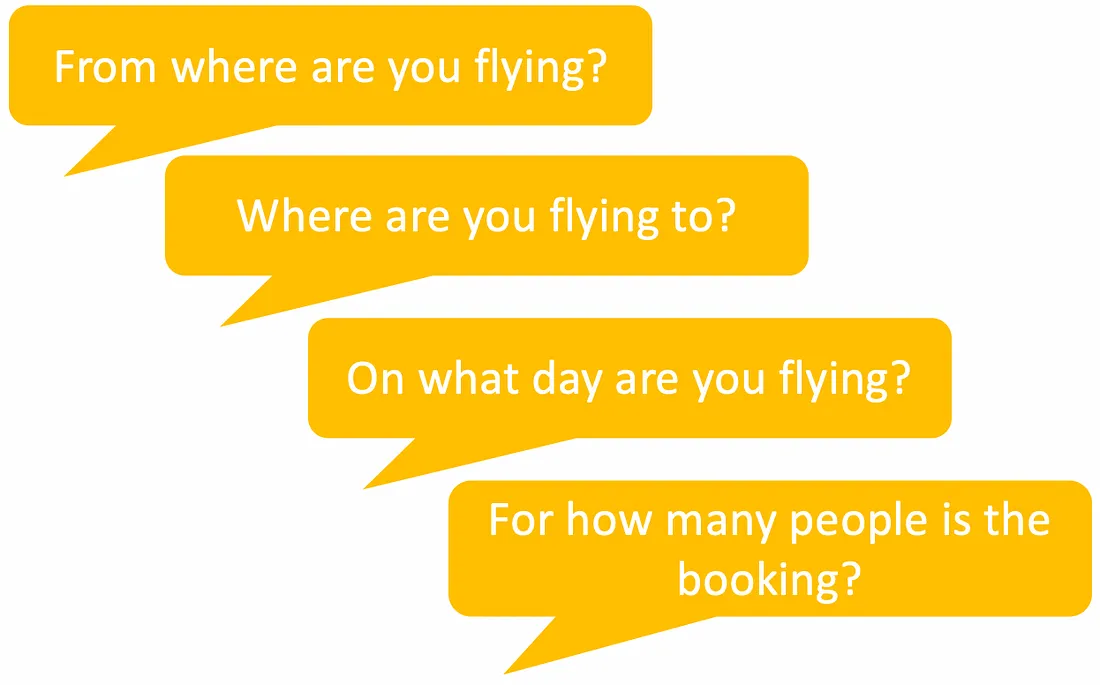

Uma estrutura como o [AWS Lex V2](https://cobusgreyling.medium.com/evaluating-the-amazon-lex-version-2-chatbot-framework-d69300f4e60a) tem uma abordagem de preenchimento de slot, em que a interface não é conversacional e não estruturada e a estrutura gira em torno do preenchimento de slot.

Em <font color="red">segundo lugar</font>, a abordagem mais [sofisticada](https://cobusgreyling.medium.com/the-emergence-of-entity-structures-in-chatbots-981a1f4291b7) é projetar uma abordagem composta e contextual para tipos de entidade. E, no caso do aprendizado de máquina [Microsoft LUIS](https://cobusgreyling.medium.com/an-overview-of-microsoft-luis-machine-learned-entities-896f4ebff613), as entidades aninhadas estão sendo pioneiras; você pode ler mais sobre entidades aninhadas [aqui](https://cobusgreyling.medium.com/an-overview-of-microsoft-luis-machine-learned-entities-896f4ebff613).


Uma característica dessa abordagem é onde o `chatbot explora a entrada do usuário completamente em busca de entidades`. O chatbot não solicita novamente ao usuário nenhuma entrada já fornecida pelo usuário. O usuário também não é forçado a aderir a uma estrutura predefinida e formatar sua entrada.

Esta abordagem é ilustrada pela imagem abaixo, a entrada do usuário contém entidades compostas que são extraídas contextualmente do enunciado do usuário.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*gwX1kaGchbKxO-aAses01Q.png)

Também existe uma tendência entre os líderes do Gartner de ter entidades associadas a propósitos específicos. Portanto, uma vez que uma `intenção` é detectada, o `NLU` tem um pool menor de entidades possíveis esperadas associadas à intenção identificada.

# Três tipos de entidades

Pode-se argumentar que existem três abordagens para a extração de entidade. . . 

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*JuZtnDIcEdZ3yxpcNrHwfg.png)

# Entidades Definidas NLU

Essas entidades são `entidades personalizadas`, predominantemente definidas dentro de uma estrutura de desenvolvimento de `chatbot`. Leia mais sobre o surgimento de estruturas de entidade em `chatbots` e por que é importante capturar dados não estruturados com accurately e eficiência [aqui](https://cobusgreyling.medium.com/the-emergence-of-entity-structures-in-chatbots-981a1f4291b7).

# Entidades Nomeadas

No `NLP`, uma [Entidade Nomeada](https://cobusgreyling.medium.com/here-are-the-nvidia-riva-demo-applications-d04c6f93809b) é um objeto do mundo real, como `pessoas`, `lugares`, `empresas`, `produtos`, etc. As entidades nomeadas não requerem treinamento ou qualquer processo que defina as entidades nomeadas (na maioria dos casos) os sistemas `NLP`/`NLU` detectam automaticamente. O único impedimento é a disponibilidade da funcionalidade das entidades nomeadas em uma linguagem humana específica.

Essas entidades nomeadas podem ser `abstratas` ou ter uma `existência física`. Abaixo estão exemplos de entidades nomeadas sendo detectadas pelo [Riva NLU](https://cobusgreyling.medium.com/here-are-the-nvidia-riva-demo-applications-d04c6f93809b).

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/0*-S6HB7TLtP-lvbAa.png)

O [spaCy](https://spacy.io/) também possui um sistema de detecção de entidades nomeadas muito eficiente, que também atribui rótulos. O modelo padrão identifica um host de entidades nomeadas e numéricas. Isso pode incluir lugares, empresas, produtos e afins.

In [4]:
# Vamos comprovar isso!

import spacy

nlp = spacy.load('pt_core_news_md')
doc = nlp("Jensen Huang é o CEO da NVIDIA Corporation, localizada em Santa Clara, Califórnia.")


for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)



Jensen Huang 0 12 PER
NVIDIA Corporation 24 42 ORG
Santa Clara 58 69 LOC
Califórnia 71 81 LOC


* `Text:` O texto da entidade original.

* `Start`: Índice de início da entidade no doc

* `End:` Índice do fim da entidade no doc

* `Label:` Rótulo da entidade, ou seja, tipo

# <font color="red">Voltar para modelos de linguagem grandes</font>

Antes de chegarmos aos `LLMs` e `Entidades` ... A funcionalidade dos `LLMs` pode ser dividida em duas implementações amplas, `Geração` e `Representação`.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*T3SLBhs6H_XIthVLiSxU9g.png)

Neste [artigo](https://cobusgreyling.medium.com/bootstrapping-a-chatbot-with-a-large-language-model-93fdf5540a1b), você pode ler mais sobre como um `modelo generativo` e de `representação` pode ser usado para inicializar um `chatbot` fazendo uso de `pesquisa semântica`, `geração de linguagem` e um conceito que gosto de chamar de [documentos de intenção](https://cobusgreyling.medium.com/bootstrapping-a-chatbot-with-a-large-language-model-93fdf5540a1b).

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*fruPmwWVOhuxvknjr-EQdg.png)

O `Modelo de Linguagem de Representação` é usado para [classificação](https://cobusgreyling.medium.com/fine-tuned-text-classification-with-co-here-7dea77a187c5) e [pesquisa semântica](https://cobusgreyling.medium.com/pinecone-in-the-simplest-terms-d18b9bce7cd).

# Extração de entidade com LLM's

Para `Extração de Entidade`, usaremos o `Modelo de Linguagem de geração` [Co:here](https://cohere.ai/), que pode ser usado para `Completion` (conclusão), `resumo de texto` e `Extração de Entidade`.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*kDPvhk_VoN52MANqUhaESw.png)

Treinar um modelo e `Extrair Entidades` usando um LLM como [Co:here](https://cohere.ai/) são diferentes das seguintes maneiras:

* Uma pequena quantidade de dados de treinamento é necessária para uma abordagem de `few-shot training`.

* A accuracy com dados altamente variáveis ​​foi surpreendente.

* O gerenciamento de um ambiente com várias amostras de treinamento e várias Entidades pode se tornar complexo. Um ambiente de estúdio de gerenciamento gráfico será ideal para gerenciar visualmente as entidades por meio de uma interface sem código.

* Não testei a extração de entidade com `entidades compostas`, `múltiplas entidades por enunciado` ou `sentença`. O sistema se saiu bem em detectar entidades com várias palavras, algo em que a extração tradicional de entidades geralmente falha.

* Os enunciados dos quais as Intenções foram extraídas eram, em alguns casos, bastante longas, o que tornava o desempenho do LLM ainda mais impressionante.

* Esse tipo de extração é interessante porque não apenas olha cegamente para o texto. O modelo captou as informações do filme durante seu processo de pré-treinamento e isso o ajuda a entender a tarefa com apenas alguns exemplos.


`Segue abaixo os dados de treinamento utilizados, no formato JSON.`

In [ ]:
movie_examples = [
("Deadpool 2", "Deadpool 2 | Official HD Deadpool's \"Wet on Wet\" Teaser | 2018"),
("none", "Jordan Peele Just Became the First Black Writer-Director With a $100M Movie Debut"),
("Joker", "Joker Officially Rated “R”"),
("Free Guy", "Ryan Reynolds’ 'Free Guy' Receives July 3, 2020 Release Date - About a bank teller stuck in his routine that discovers he’s an NPC character in brutal open world game."),
("none", "James Cameron congratulates Kevin Feige and Marvel!"),
("Guardians of the Galaxy", "The Cast of Guardians of the Galaxy release statement on James Gunn"),
]



E a seguir obtemos os dados para analisar:

In [ ]:
['Hayao Miyazaki Got So Bored with Retirement He Started Directing Again ‘in Order to Live’',  
"First poster for Pixar's Luca",  
'New images from Space Jam: A New Legacy',  
'Official Poster for "Sonic the Hedgehog 2"',  
'Ng Man Tat, legendary HK actor and frequent collborator of Stephen Chow (Shaolin Soccer, God of Gambler) died at 70',  
'Zack Snyder’s Justice League has officially been Rated R for for violence and some language',  
'HBOMax and Disney+ NEED to improve their apps if they want to compete with Netflix.',  
'I want a sequel to Rat Race where John Cleese’s character dies and invites everyone from the first film to his funeral, BUT, he’s secretly set up a Rat Maze to trap them all in. A sort of post-mortem revenge on them for donating all his wealth to charity.',
"'Trainspotting' at 25: How an Indie Film About Heroin Became a Feel-Good Classic",  
'‘Avatar: The Last Airbender’ Franchise To Expand With Launch Of Nickelodeon’s Avatar Studios, Animated Theatrical Film To Start Production Later This Year']


# Notebook: Extração de entidades com modelos generativos

<font color="orange">Nesta parte vamos usar os modelos generativos de `Cohere` para `extrair o nome de um filme` do título de um artigo. Isso demonstra o `Reconhecimento de Entidade Nomeada` (NER) de entidades que são mais difíceis de isolar usando outros métodos de NLP (`e onde o pré-treinamento fornece ao modelo algum contexto sobre essas entidades`). Isso também demonstra o caso de uso mais amplo da geração estruturada com base no fornecimento de vários exemplos no prompt.</font>

![Extracting Entities from text](https://github.com/cohere-ai/notebooks/raw/main/notebooks/images/keyword-extraction-gpt-models.png)

Usaremos títulos de postagens do `r/Movies subreddit`. E para cada título, vamos extrair de qual filme é o post. Se o modelo não conseguir detectar o nome de um filme sendo mencionado, ele retornará "none".

## Configurações

<font color="orange">Vamos começar instalando os pacotes que precisamos.</font>

In [ ]:
#%pip install cohere requests tqdm

<font color="orange">Em seguida, importaremos esses pacotes e declararemos a função que recupera os `títulos dos posts do reddit`.</font>

In [1]:
import cohere
import pandas as pd
import requests
import datetime
from tqdm import tqdm
pd.set_option('display.max_colwidth', None)


def get_post_titles(**kwargs):
    """ Obtém Dados da API pushshift. Leia mais: https://github.com/pushshift/api """
    base_url = f"https://api.pushshift.io/reddit/search/submission/"
    payload = kwargs
    request = requests.get(base_url, params=payload)
    return [a['title'] for a in request.json()['data']]
    # json_data = request.json()
    # if 'data' in json_data:
    #     return [a['title'] for a in json_data['data']]
    # else:
    # # trate o erro de alguma forma, como retornando uma lista vazia
    #     return []


In [2]:
get_post_titles()

['naughty redheads are the best',
 'Low digit female t33ns hit me up on session. Down for anything',
 'Tell me your most secret fantasy!',
 "Don't stop fucking me love",
 'I promise to be very obedient and not moan too loudly',
 'Selling feet pics!',
 'New content daily💦💦💦',
 'Letting all the boys in the club grope me',
 'I’ll do yours if you do mine',
 'Headset Microphone not detected by windowns']

Você precisará de sua `chave de API` para esta próxima célula. [Inscreva-se no Cohere](https://dashboard.cohere.ai/welcome/login?redirect_uri=%2F) e obtenha um, caso ainda não o tenha.

In [24]:
# Isto é quando usas o arquivo .env:
from dotenv import load_dotenv
import os
import sys
print('Carregando a minha chave Key: ', load_dotenv())
Eddy_API_KEY_Cohere = os.environ['COHERE_API_KEY'] 


# Crie uma conexão com a API Cohere usando sua chave de trilha (trail) 
co = cohere.Client(Eddy_API_KEY_Cohere)


Carregando a minha chave Key:  True


## Preparando exemplos para o prompt

Em nosso `prompt`, apresentaremos o modelo com exemplos para o tipo de saída que procuramos. Basicamente, obtemos um `conjunto de títulos de artigos do subreddit` e os rotulamos nós mesmos. O rótulo aqui é o nome do filme mencionado no título (e "none" se nenhum filme for mencionado).

![Labeled dataset of text and extracted text](https://github.com/cohere-ai/notebooks/raw/main/notebooks/images/keyword-extraction-dataset.png)

In [5]:
movie_examples = [
("Deadpool 2", "Deadpool 2 | Official HD Deadpool's \"Wet on Wet\" Teaser | 2018"),
("none", "Jordan Peele Just Became the First Black Writer-Director With a $100M Movie Debut"),
("Joker", "Joker Officially Rated “R”"),
("Free Guy", "Ryan Reynolds’ 'Free Guy' Receives July 3, 2020 Release Date - About a bank teller stuck in his routine that discovers he’s an NPC character in brutal open world game."),
("none", "James Cameron congratulates Kevin Feige and Marvel!"),
("Guardians of the Galaxy", "The Cast of Guardians of the Galaxy release statement on James Gunn"),
]

## Criando o prompt de extração

Criaremos um `prompt` que demonstra a tarefa para o modelo. O `prompt` contém os exemplos acima e, em seguida, apresenta o texto de entrada e pede ao modelo para extrair o nome do filme.

![Extraction prompt containing the examples and the input text](https://github.com/cohere-ai/notebooks/raw/main/notebooks/images/extraction-prompt-example.png)

## Crie o prompt (Execute esta célula para executar o código necessário)

In [30]:
#@title Create the prompt (Run this cell to execute required code) {display-mode: "form"}

class cohereExtractor():
    def __init__(self, examples, example_labels, labels, task_desciption, example_prompt):
        self.examples = examples
        self.example_labels = example_labels
        self.labels = labels
        self.task_desciption = task_desciption
        self.example_prompt = example_prompt

    def make_prompt(self, example):
        examples = self.examples + [example]
        labels = self.example_labels + [""]
        return (self.task_desciption +
                "\n---\n".join( [examples[i] + "\n" +
                                self.example_prompt + 
                                 labels[i] for i in range(len(examples))]))

    def extract(self, example):
      extraction = co.generate(
          model='xlarge', # Default. Mais detalhes --> https://docs.cohere.ai/reference/generate#3-define-model-settings
          prompt=self.make_prompt(example),
          max_tokens=10,
          temperature=0.1,
          stop_sequences=["\n"])
      return(extraction.generations[0].text[:-1])


cohereMovieExtractor = cohereExtractor([e[1] for e in movie_examples], 
                                       [e[0] for e in movie_examples], [],
                                       "", 
                                       "Extrai o título do filme do Post:")

# Uncomment to inspect the full prompt:
# print(cohereMovieExtractor.make_prompt('<input text here>'))

In [31]:
# É assim que o Prompt se parece
print(cohereMovieExtractor.make_prompt('<input text here>'))

Deadpool 2 | Official HD Deadpool's "Wet on Wet" Teaser | 2018
Extrai o título do filme do Post:Deadpool 2
---
Jordan Peele Just Became the First Black Writer-Director With a $100M Movie Debut
Extrai o título do filme do Post:none
---
Joker Officially Rated “R”
Extrai o título do filme do Post:Joker
---
Ryan Reynolds’ 'Free Guy' Receives July 3, 2020 Release Date - About a bank teller stuck in his routine that discovers he’s an NPC character in brutal open world game.
Extrai o título do filme do Post:Free Guy
---
James Cameron congratulates Kevin Feige and Marvel!
Extrai o título do filme do Post:none
---
The Cast of Guardians of the Galaxy release statement on James Gunn
Extrai o título do filme do Post:Guardians of the Galaxy
---
<input text here>
Extrai o título do filme do Post:


# Obtendo os dados

<font color="orange">Vamos agora fazer a chamada de API para obter as principais postagens de `2021` de `r/movies`.</font>

In [32]:
# num_posts = 10

# movies_list = get_post_titles(size=num_posts, 
#       after=str(int(datetime.datetime(2021,1,1,0,0).timestamp())), 
#       before=str(int(datetime.datetime(2022,1,1,0,0).timestamp())), 
#       subreddit="movies", 
#       sort_type="score", 
#       sort="desc")   # <--- Este parâmetro estava dando problemas

# # Mostra a list
# movies_list

<font color="pink">O código estava dando problemas já que o parâmetro sort não aceita "desc". Isso foi percebido usando o seguinte código:</font>

In [33]:
num_posts = 10

payload = {
    'size': num_posts,
    'after': str(int(datetime.datetime(2021, 1, 1, 0, 0).timestamp())),
    'before': str(int(datetime.datetime(2022, 1, 1, 0, 0).timestamp())),
    'subreddit': 'movies',
    'sort_type': 'score',
    'sort': 'desc'
}

request = requests.get("https://api.pushshift.io/reddit/search/submission/", params=payload)



print(request.status_code)
print(request.text)


422
{"detail":[{"loc":["query","sort"],"msg":"unexpected value; permitted: 'id', 'created_utc', 'score'","type":"value_error.const","ctx":{"given":"desc","permitted":["id","created_utc","score"]}}]}


<font color="yellow">O erro que está ocorrendo é referente ao parâmetro `"sort"`. Como pode ser visto na mensagem de erro, o valor `"desc"` não é um valor válido para este parâmetro. De acordo com a mensagem, os valores permitidos são `"id"`, `"created_utc"` e `"score"`.

Substitua `"desc"` por `"score"` no parâmetro `"sort"` para resolver o problema.</font>

NOTA:

<font color="red">Tenha em conta que só fiz 3 requisições porque a API Cohere só me permite 5 por minuto. Lei mais na documentação [Cohere](https://docs.cohere.ai/reference/about). </font>

In [28]:
num_posts = 3

movies_list = get_post_titles(size=num_posts, 
      after=str(int(datetime.datetime(2021,1,1,0,0).timestamp())), 
      before=str(int(datetime.datetime(2022,1,1,0,0).timestamp())), 
      subreddit="movies", 
      sort_type="score", 
      sort="score")
      
# Mostra a lista
movies_list


['‘Dune’ Sequel Greenlit By Legendary For Exclusive Theatrical Release',
 'First image of Adam Driver and Lady Gaga as Maurizio Gucci and Patrizia Reggiani in Ridley Scott’s ‘House of Gucci’ - The story of how Patrizia Reggiani, the ex-wife of Maurizio Gucci, plotted to kill her husband, the grandson of renown fashion designer Guccio Gucci.',
 'I hate inconsistent movie volume']

# Executando o modelo

<font color="orange">E agora passamos pelos `posts` e processamos cada um deles com nosso "extractor".</font>

In [34]:
results = []
for text in tqdm(movies_list):
    try:
        extracted_text = cohereMovieExtractor.extract(text)
        results.append(extracted_text)
    except Exception as e:
        print('ERROR: ', e)
        





100%|██████████| 3/3 [00:02<00:00,  1.25it/s]


In [35]:
# Temos tamanhos difrentes: 

print(len(movies_list))
print(len(results))


3
3


<font color="orange">Vejamos os resultados:</font>

In [36]:
pd.DataFrame(data={'text': movies_list, 'extracted_text': results})


,text,extracted_text
0,‘Dune’ Sequel Greenlit By Legendary For Exclusive Theatrical Release,Dune
1,"First image of Adam Driver and Lady Gaga as Maurizio Gucci and Patrizia Reggiani in Ridley Scott’s ‘House of Gucci’ - The story of how Patrizia Reggiani, the ex-wife of Maurizio Gucci, plotted to kill her husband, the grandson of renown fashion designer Guccio Gucci.",House of Gucci
2,I hate inconsistent movie volume,none


<font color="orange">Olhando para esses resultados, o modelo respondeu corretamente. 

Ao experimentar `prompts de extração`, geralmente encontraremos casos extremos ao longo do caminho. E se um post tiver dois filmes citados, `por exemplo?` Quanto mais encontrarmos esses exemplos, mais exemplos poderemos adicionar ao prompt que abordam esses casos.</font>

# Quão bem isso funciona?

<font color="orange">Podemos medir melhor o desempenho desse método de extração usando um Dataset maior Rotulado. Então, vamos carregar um conjunto de teste de 100 exemplos:</font>

In [39]:
test_df = pd.read_csv('https://raw.githubusercontent.com/cohere-ai/notebooks/main/notebooks/data/movie_extraction_test_set_100.csv', index_col=0)

test_df = test_df[:5] # <--- Coloque apenas 5, já que a API de Cohere só me permite chamar 5 vezes por moinuto  

test_df.head(10)

,text,label
0,Disney's streaming service loses some movies due to old licensing deals,none
1,"Hi, I’m Sam Raimi, producer of THE GRUDGE which hits theaters tonight. Ask Me Anything!",The Grudge
2,'Parasite' Named Best Picture by Australia's AACTA Awards,Parasite
3,Danny Trejo To Star In Vampire Spaghetti Western ‘Death Rider in the House of Vampires’,Death Rider in the House of Vampires
4,I really wish the 'realistic' CGI animal trend would end.,none


Vamos executar o `extractor` nos títulos desses posts (chamando a `API` em paralelo para resultados mais rápidos):

In [40]:
from concurrent.futures import ThreadPoolExecutor

extracted = []
# Run the model to extract the entities
with ThreadPoolExecutor(max_workers=8) as executor:
    for i in executor.map(cohereMovieExtractor.extract, test_df['text']):
        extracted.append(str(i).strip())
# Save results
test_df['extracted_text'] = extracted


Vejamos alguns resultados:

In [41]:
test_df.head()

,text,label,extracted_text
0,Disney's streaming service loses some movies due to old licensing deals,none,none
1,"Hi, I’m Sam Raimi, producer of THE GRUDGE which hits theaters tonight. Ask Me Anything!",The Grudge,none
2,'Parasite' Named Best Picture by Australia's AACTA Awards,Parasite,Parasite
3,Danny Trejo To Star In Vampire Spaghetti Western ‘Death Rider in the House of Vampires’,Death Rider in the House of Vampires,Death Rider in the House of Vampires
4,I really wish the 'realistic' CGI animal trend would end.,none,none


<font color="orange">Vamos calcular a `accuracy` comparando com os exemplos rotulados</font>

In [42]:
# Comparamos o Rótulo com o texto Extraído
test_df['correct'] = (test_df['label'].str.lower() == test_df['extracted_text'].str.lower()).astype(int)

# Printamos a accuracy
print(f'Classification accuracy {test_df["correct"].mean() *100}%')


Classification accuracy 80.0%


<font color="orange">Portanto, parece que este prompt funciona bem neste pequeno conjunto de teste. No entanto, não é garantido que funcionará tão bem em outros conjuntos. O `prompt` pode ser aprimorado experimentando mais dados, descobrindo casos extremos e adicionando mais exemplos ao `prompt`.

Podemos ver os exemplos que deu errado:</font>

In [43]:
test_df[test_df['correct']==0]


,text,label,extracted_text,correct
1,"Hi, I’m Sam Raimi, producer of THE GRUDGE which hits theaters tonight. Ask Me Anything!",The Grudge,none,0


<font color="orange">Na verdade, não conseguiu pegar alguns exemplos. Às vezes, isso revela casos extremos e erros compreensíveis (`por exemplo`, dois filmes são mencionados no texto).

Podemos consultar o relatório de classificação para uma visão mais detalhada do que está incluído no conjunto de teste e o que o modelo acertou e errou:</font>

In [45]:
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')


print(classification_report(test_df['label'].str.lower(), test_df['extracted_text'].str.lower()))


                                      precision    recall  f1-score   support

death rider in the house of vampires       1.00      1.00      1.00         1
                                none       0.67      1.00      0.80         2
                            parasite       1.00      1.00      1.00         1
                          the grudge       0.00      0.00      0.00         1

                            accuracy                           0.80         5
                           macro avg       0.67      0.75      0.70         5
                        weighted avg       0.67      0.80      0.72         5



<font color="pink">Esse tipo de extração é interessante porque não apenas olha cegamente para o texto. O modelo captou as informações do filme durante seu processo de pré-treinamento e isso o ajuda a entender a tarefa com apenas alguns exemplos.

Você pode pensar em estender isso para outros `subreddits`, para extrair outros tipos de `Entidades` e `informações`. 

Feliz estudo!</font>